# Problem 5 Application to Linguistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (a)

Let X and Y denote the frequencies in Twain and Snodgrass essays respectively. The null hypothesis and the alternative hypothesis are 

$H_0 : \ \mu_X - \mu_Y = 0 \quad \text{vs} \quad H_1 : \ \mu_X - \mu_Y \neq 0 $

The test statistic is 

$W(X,Y) = \left| \frac{\bar{X}_n-\bar{Y}_m}{\sqrt{\frac{s_X^2}{n} + \frac{s_Y^2}{m}}} \right|$

The p-value is given by 

$p(x,y) = \mathbb{P} \left(W(X,Y) > W(x,y)|H_0\right),$

where $x$ and $y$ are the observed values of $X$ and $Y$.

From the given data, the correspondent p-value is $p \simeq 0.0002$, which means at a high confidence level we can reject the null hypothesis.

In [5]:
X = np.array([0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217])
Y = np.array([0.209, 0.205, 0.196, 0.210, 0.202, 0.207, 0.224, 0.223, 0.220, 0.201])
n = len(X)
m = len(Y)

W = np.abs((X.mean()-Y.mean())/np.sqrt(X.var(ddof=1)/n+Y.var(ddof=1)/m))
print("The Wald statistic is", W)

from scipy.stats import norm
p = 2*(1-norm.cdf(W)) 
print("The p-value is", p)

The Wald statistic is 3.70355354433
The p-value is 0.000212600282258


### (b)

For permutation test, the null hypothesis is the two samples are from the same distribution and the correspondent p-value is given by

$p(x,y) = \mathbb{P}_0(s > s_\text{obs}) \simeq \frac{1}{K} \sum_{i=1}^K I (s_i > s_\text{obs})$,

where $s_\text{obs} = S(x,y)$ and $s_i$ is calculated from a random permutation of $Z = (X,Y)$. Here we choose $S(X,Y) = |\bar{X}_n - \bar{Y}_m|$

From the given data, the correspondent p-value is $p\simeq 0.0007$, which means at a high confidence level we can reject the null hypothesis.

In [58]:
Z = np.append(X,Y)
s_obs = np.abs(X.mean()-Y.mean())

K = 10**5
count = 0
np.random.seed(42)
for i in range(K):
    Z_i = np.random.permutation(Z)
    s_i = np.abs(Z_i[:n].mean()-Z_i[n:].mean())
    if s_i > s_obs:
        count += 1

print("the p-value of the permutation test is", count/K)

the p-value of the permutation test is 0.00068


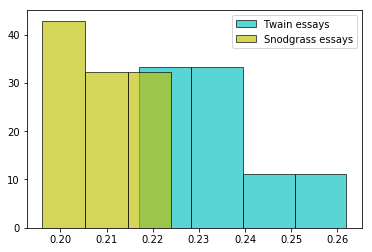

In [98]:
plt.hist(X, bins=4,normed=True,color='c', edgecolor='k', alpha=0.65,label="Twain essays")
plt.hist(Y, bins=3,normed=True,color='y', edgecolor='k', alpha=0.65,label="Snodgrass essays")
plt.legend()
plt.show()